# **Exploratiory Data Analysis (EDA) 🧭**
Compared to other Machine Learning Project options for exploratory data analysis are rare, especially beacause we can't perform much of statistical analysis. Still we can draw some insights from a preliminiary analysis. 

In this notebook we have a first glance at time images, identify class imbalances and compare image qualities.

Table of Contents:
---
0. Imports
1. View Images
2. Identifying Class Imbalances
3. Plotting Image Size
4. Conclusions after EDA

## 0. Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras

In [ ]:
#image directories
direct_0= "../Data/Dataset_original/"
direct_1= "../Data/Dataset_original/Data_Fire/"
direct_2= "../Data/Dataset_original/Data_NonFire/"

## 1. View Images 
Below we provide a glance on a sample of the images in the Forest Fire Dataset, to provide a first idea of the 2 classes we are dealing with:

### Class 1: Fire Images

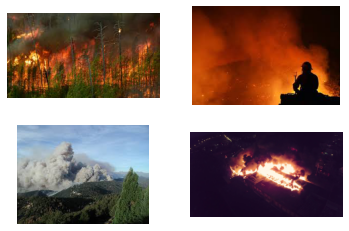

In [ ]:
#exploring the data
image_datas = []
for x in range(0,4):
    image_datas.append(Image.open(direct_1+os.listdir(direct_1)[x])) 
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(image_datas[0])
axarr[0,0].axis('off')
axarr[0,1].imshow(image_datas[1])
axarr[0,1].axis('off')
axarr[1,0].imshow(image_datas[2])
axarr[1,0].axis('off')
axarr[1,1].imshow(image_datas[3])
axarr[1,1].axis('off')
plt.show()

### Class 2: Non Fire Images

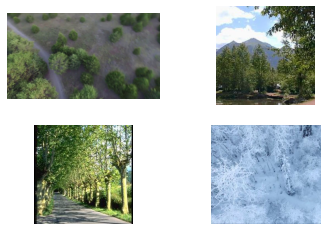

In [ ]:
#exploring the data
image_datas = []
for x in range(0,4):
    image_datas.append(Image.open(direct_2+os.listdir(direct_2)[x])) 
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(image_datas[0])
axarr[0,0].axis('off')
axarr[0,1].imshow(image_datas[1])
axarr[0,1].axis('off')
axarr[1,0].imshow(image_datas[2])
axarr[1,0].axis('off')
axarr[1,1].imshow(image_datas[3])
axarr[1,1].axis('off')
plt.show()

Additional note: We did a manual scan on the dataset and identified multiple empty files which we removed from the dataset (in total: 389). Moreover, we identified 375 images which we had to remove because they were not fitting into their class. 

## 2. Identifying Class Imbalance
After removing 764 images from the dataset, as described in the previous section, we end up with a slightly imbalanced dataset. 

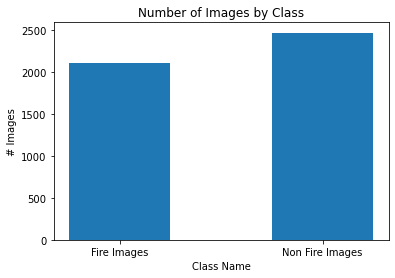

In [ ]:
number_classes = {'Fire Images': len(os.listdir(direct_1)),
                 'Non Fire Images': len(os.listdir(direct_2))
}
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

## 3. Plotting Image Size
The datasets includes a wide range of image qualities, as we can see below.

In [ ]:
directories = {'Fire_Images': direct_1,
'Non_Fire_Images': direct_2,
}

def get_dims(file):
  '''Returns dimenstions for an RBG image'''
  im = Image.open(file)
  arr = np.array(im)
  try:
    h,w,d = arr.shape
  except Exception as e:
    h,w = arr.shape
  return h,w

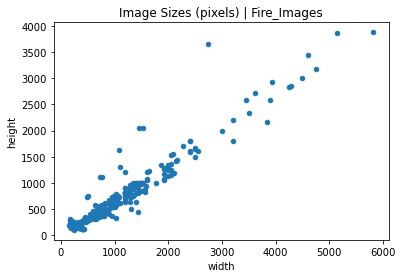

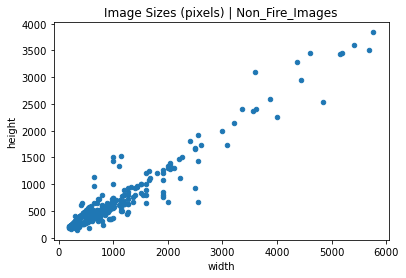

In [ ]:
#Display 
#Adapted from: https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
#!pip install 'fsspec>=0.3.3'
#!pip install dask
import dask.bag as bag
for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = bag.from_sequence(filelist).map(get_dims)
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

## 4. Conclusions after EDA

Following the Exploratory Data Analysis we had to remove a total of 764 images from the dataset, because of corrupted or irrelevant files. This led into a slight imbalance of the classes, ending with a bigger Class 2: Non fire images. The pixel density of the images varies a lot. We deal with these issues in our second notebook 02_Modelling.


## References

Adapted from: https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a